<center>
    <b><font size="6",color='#00759c'>LAB 6: Point Estimates and Confidence Intervals</font></b>
 </center>
    
  <h2><center>
    Chouliaras Andreas 2143 achouliaras@inf.uth.gr <br>
    Giannoukos Triantafyllos-Anargyros 2232 tgiannoukos@inf.uth.gr <br>
    Matzoros Christos-Konstantinos 2169 cmatzoros@inf.uth.gr <br>
 </center></h2>

In [1]:
#install.packages('ggplot2')

In [2]:
set.seed(12)
population_ages <- c(rexp(1000000,0.015)+18, # Generate a population
 rpois(500000,20)+18,
 rpois(500000,32.5)+18,
 rpois(500000,45)+18)
population_ages <- ifelse(population_ages<100, population_ages, population_ages%%100+18)
true_mean <- mean(population_ages) # Check the population mean


\begin{exercise}
a) Show that the data follow normal distribution, since according to the above
theorem states, in order for the t-interval for the mean to be appropriate, the data must follow a
normal distribution, and b) calculate a 95% confidence interval for the mean
\end{exercise}



Number of pounds of beef consumed per year sample:
 118 115 125 110 112 130 117 112 115 120 113 118 119 122 123 126

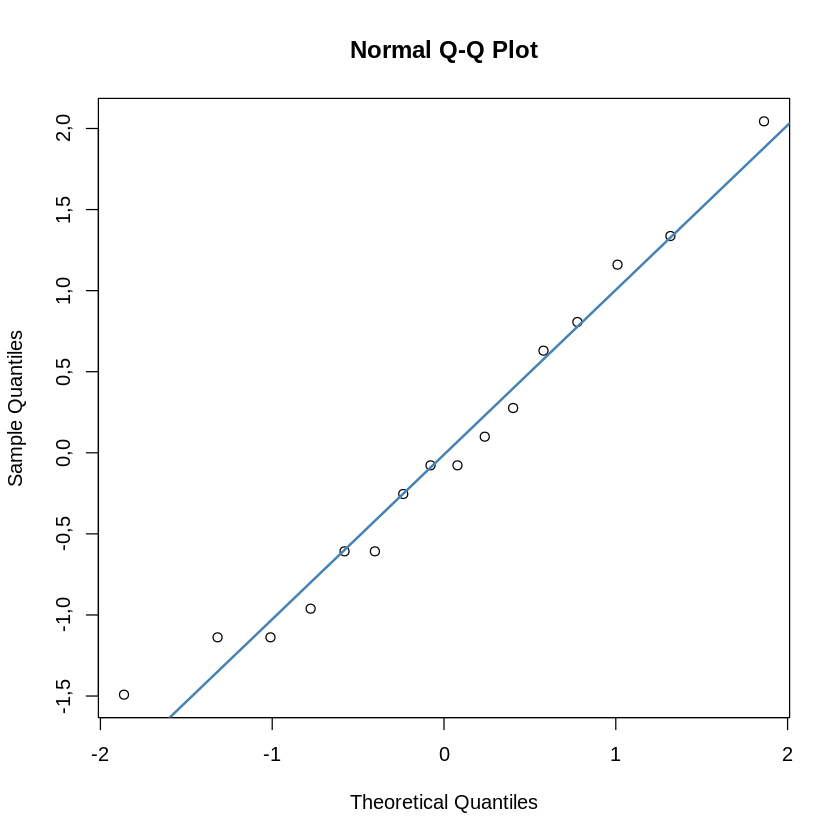

In [3]:
pounds_per_year = c(118,115,125,110,112,130,117,112,115,120,113,118,119,122,123,126)
cat("Number of pounds of beef consumed per year sample:\n",pounds_per_year)
sample_size = length(pounds_per_year)

sample_mean = mean(pounds_per_year)
std=sd(pounds_per_year)

qqnorm((pounds_per_year-sample_mean)/std)
qqline((pounds_per_year-sample_mean)/std, col = "steelblue", lwd = 2)

As we can see from the normal probability plot, the data are (sufficiently) normally distributed because the data points fall at least approximately on a straight line.

In [4]:
sample_mean = mean(pounds_per_year)
cat("The sample mean is:",sample_mean," pounds")

The sample mean is: 118,4375  pounds

In [5]:
std=sd(pounds_per_year)
cat("The sample standard deviation is",std)

The sample standard deviation is 5,656486

For a 95% confidence interval with n = 16 data points we have:

In [6]:
t = qt(0.975, df = sample_size-1)
t

[1] 2,13145

In [7]:
margin_of_error = t*(std/sqrt(sample_size))
cat("Margin_of_error is",std)

Margin_of_error is 5,656486

In [8]:
interval = c(sample_mean-margin_of_error,sample_mean+margin_of_error)
cat("95% Confidence Interval:[",interval[1],",",interval[2],"]")

95% Confidence Interval:[ 115,4234 , 121,4516 ]


\begin{exercise}
a) Show that the data follow normal distribution, since according to the above
theorem states, in order for the t-interval for the mean to be appropriate, the data must follow a
normal distribution, and b) calculate a 95% confidence interval for the mean
\end{exercise}


[1] 64

[1] 222,1974

[1] 345,2344

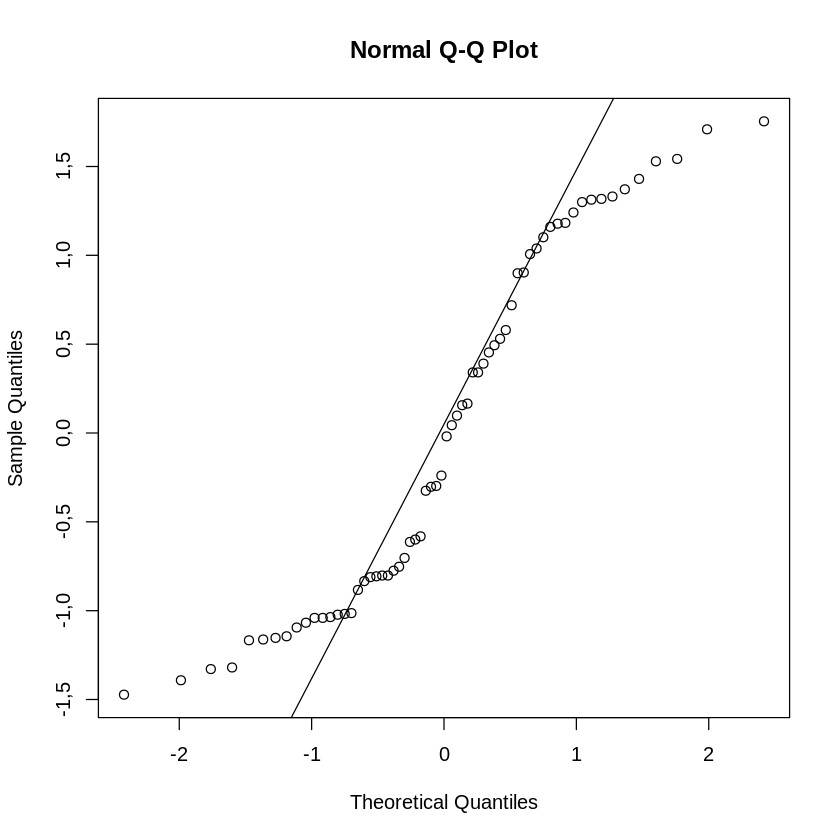

In [9]:
survival_time = c(36,18,91,89,87,86,52,50,149,120,119,118,115,114,114,108,102,189,178,173,167,167,166,165,160,216,212,209,292,279,278,273,341,382,380,367,355,446,432,421,421,474,463,455,546,545,505,590,576,569,641,638,637,634,621,608,607,603,688,685,663,650,735,725)
sample_size = length(survival_time)
sample_size
sample_std = sd(survival_time)
sample_std
sample_mean = mean(survival_time)
sample_mean
qqnorm((survival_time-sample_mean)/sample_std)
qqline((survival_time-sample_mean)/sample_std)

Because the data points on the QQ plot do not adhere well to a straight line, it suggests that the survival times are not normally distributed. Because the sample is large enough, we can use the t-interval for the mean.

In [10]:
t = qt(0.975,sample_size-1)
t
moe = t*sample_std/sqrt(sample_size)
moe
ci = c(sample_mean-moe,sample_mean+moe)
ci

[1] 1,998341

[1] 55,50325

[1] 289,7311 400,7376

So, we are 95% confident that the mean survival time for the population is between 289.7 and 400.7 days.


\begin{exercise}
For the population generated in section 1 of this document, a) create the sample of size 1000, b)
compute the z-critical value using the qnorm R function, and compute the confidence interval
using the z-value.
The following code generates 25 confidence intervals and plots them. Discuss what you
observed.
\end{exercise}


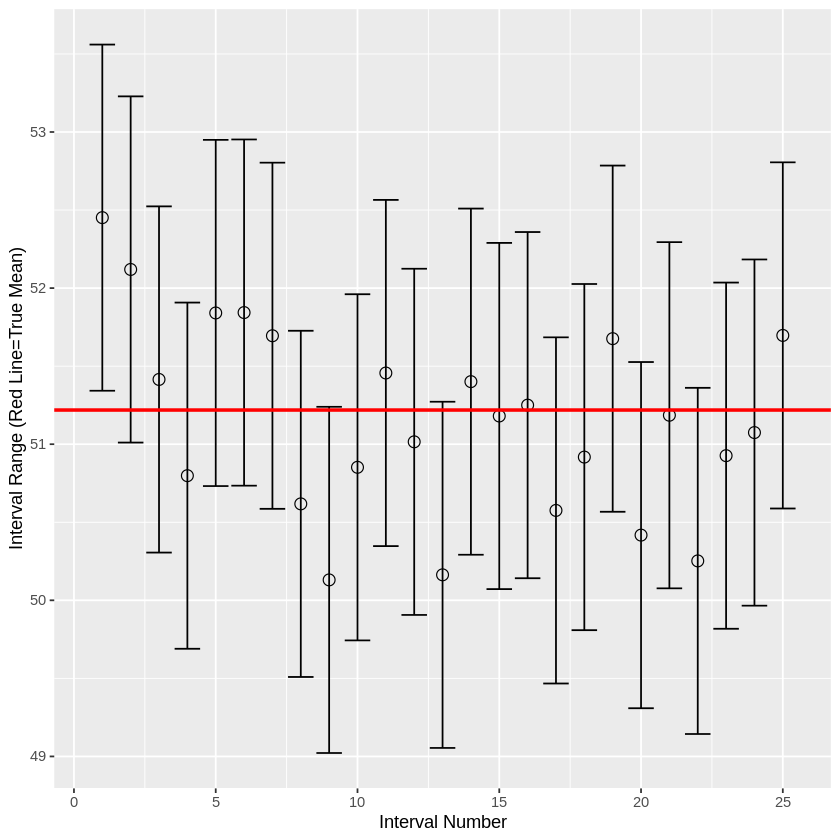

In [11]:
set.seed(12) 
sample_size <- 1000 
intervals <- c() # Create and store 25 intervals 
for (sample in 1:25){ 
    sample_ages <-sample(population_ages, size=sample_size) # Take a sample of 1000 ages
    sample_mean <- mean(sample_ages) # Get the sample mean
    z_critical <- qnorm(0.975) # Get the z-critical value*
    pop_stdev <- sd(population_ages) # Get the population standard deviation
    margin_of_error <- z_critical * (pop_stdev / sqrt(sample_size)) # Calculate margin of er ror
    confidence_interval <- c(sample_mean - margin_of_error, # Calculate the the interval
    sample_mean + margin_of_error)
    intervals <- c(intervals, confidence_interval) 
}
interval_df <- data.frame(t(matrix(intervals,2,25))) # Store intervals as data frame
library(ggplot2)
# Plot confidence intervals and show the true mean
my_plot <- ggplot(data=interval_df, aes(x=1:nrow(interval_df))) +geom_errorbar(aes(ymax = X2, ymin = X1)) + geom_point(aes(y=rowMeans(interval_df)),shape=1, size=3) + geom_abline(intercept=true_mean, slope=0,color="red",lwd=1) + ylab("Interval Range (Red Line=True Mean)") + xlab("Interval Number")
my_plot

Notice that in the plot above, all but one of the 95% confidence intervals overlap the red line marking the true mean. This is to be expected: since a 95% confidence interval captures the true mean 95% of the time, we'd expect our interval to miss the true mean 5% of the time. One of the 25 confidence intervals don't overlap with the true mean. So, we can expect than in 100 confidence intervals we would get 4 CIs that do not overlap. This is within the 95% margin as expected.


\begin{exercise}
a) Show that the data follow normal distribution, since according to the above
theorem states, in order for the t-interval for the mean to be appropriate, the data must follow a
normal distribution, and b) calculate a 95% confidence interval for the mean
\end{exercise}


In [12]:
set.seed(12) 
sample_size <- 30
intervals <- c() # Create and store 25 intervals 
sample_ages <-sample(population_ages, size=sample_size) # Take a sample of 1000 ages
sample_mean <- mean(sample_ages) # Get the sample mean
z_critical <- qnorm(0.975) # Get the z-critical value*
pop_stdev <- sd(population_ages) # Get the population standard deviation
margin_of_error <- z_critical * (pop_stdev / sqrt(sample_size)) # Calculate margin of er ror
confidence_interval <- c(sample_mean - margin_of_error, sample_mean + margin_of_error)
confidence_interval


[1] 47,26299 60,06684

In [13]:
set.seed(12) 
sample_size <- 30 
sample_ages <-sample(population_ages, size=sample_size) # Take a sample of 1000 ages
t.test(sample_ages)


	One Sample t-test

data:  sample_ages
t = 14,246, df = 29, p-value = 1,261e-14
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 45,96035 61,36949
sample estimates:
mean of x 
 53,66492 


We observe that the confidence intervals that we get from the t distribution are very similar to those we get from the z distribution even with a smaller sample size.


\begin{exercise}
We can also make a confidence interval for a point estimate of a population proportion. In this
case, the margin of error equals:$$z*\left(\sqrt{\frac{p(1-p)}{n}}\right)$$

Where z is the z-critical value for our confidence level, p is the point estimate of the population
proportion and n is the sample size. Calculate a 95% confidence interval for Hispanics according
to the sample proportion 0.204.
Note: As with the confidence interval for the mean, you can use a built in R function to get a
confidence interval:
prop.test(x=204, # Number of observations n=1000) # Total number of samples
Apply this function and report the results.
\end{exercise}


In [14]:
set.seed(12) 

p =0.204
sample_size <- 1000
z_critical <- qnorm(0.975) # Get the z-critical value*
margin_of_error <- z_critical * sqrt(p*(1-p)/sample_size)
confidence_interval <- c(p - margin_of_error, p + margin_of_error)
confidence_interval


prop.test(x=204,n=1000) 

[1] 0,1790242 0,2289758


	1-sample proportions test with continuity correction

data:  204 out of 1000, null probability 0,5
X-squared = 349,28, df = 1, p-value < 2,2e-16
alternative hypothesis: true p is not equal to 0,5
95 percent confidence interval:
 0,1797036 0,2306071
sample estimates:
    p 
0,204 
